In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.options.display.float_format="{:,.2f}".format

In [9]:
#Analyzing the first dataset

In [3]:
people=pd.read_csv("people.csv")
people.head(1)

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36


In [4]:
people.shape

(189118, 41)

In [5]:
people.dtypes

people_id    object
char_1       object
group_1      object
char_2       object
date         object
char_3       object
char_4       object
char_5       object
char_6       object
char_7       object
char_8       object
char_9       object
char_10        bool
char_11        bool
char_12        bool
char_13        bool
char_14        bool
char_15        bool
char_16        bool
char_17        bool
char_18        bool
char_19        bool
char_20        bool
char_21        bool
char_22        bool
char_23        bool
char_24        bool
char_25        bool
char_26        bool
char_27        bool
char_28        bool
char_29        bool
char_30        bool
char_31        bool
char_32        bool
char_33        bool
char_34        bool
char_35        bool
char_36        bool
char_37        bool
char_38       int64
dtype: object

In [16]:
#Finding if there is null values
(people.isnull().sum()/people.shape[0])*100

people_id   0.00
char_1      0.00
group_1     0.00
char_2      0.00
date        0.00
char_3      0.00
char_4      0.00
char_5      0.00
char_6      0.00
char_7      0.00
char_8      0.00
char_9      0.00
char_10     0.00
char_11     0.00
char_12     0.00
char_13     0.00
char_14     0.00
char_15     0.00
char_16     0.00
char_17     0.00
char_18     0.00
char_19     0.00
char_20     0.00
char_21     0.00
char_22     0.00
char_23     0.00
char_24     0.00
char_25     0.00
char_26     0.00
char_27     0.00
char_28     0.00
char_29     0.00
char_30     0.00
char_31     0.00
char_32     0.00
char_33     0.00
char_34     0.00
char_35     0.00
char_36     0.00
char_37     0.00
char_38     0.00
dtype: float64

In [10]:
#Analyzing the second dataset

In [11]:
train=pd.read_csv("act_train.csv")
train.head(1)

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0


In [12]:
train.shape

(2197291, 15)

In [13]:
train.dtypes

people_id            object
activity_id          object
date                 object
activity_category    object
char_1               object
char_2               object
char_3               object
char_4               object
char_5               object
char_6               object
char_7               object
char_8               object
char_9               object
char_10              object
outcome               int64
dtype: object

In [17]:
#Finding if there is null values
(train.isnull().sum()/train.shape[0])*100

people_id            0.00
activity_id          0.00
date                 0.00
activity_category    0.00
char_1              92.83
char_2              92.83
char_3              92.83
char_4              92.83
char_5              92.83
char_6              92.83
char_7              92.83
char_8              92.83
char_9              92.83
char_10              7.17
outcome              0.00
dtype: float64

In [18]:
#Due to there are many features with a huge percentage of null values, we will drop them ir order to create a correct model
train.columns

Index(['people_id', 'activity_id', 'date', 'activity_category', 'char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9', 'char_10', 'outcome'],
      dtype='object')

In [19]:
train.drop(columns=['char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9'],inplace=True)

train.head(1)

,people_id,activity_id,date,activity_category,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,type 76,0


In [20]:
#Finding if there are still null values in the dataframe

(train.isnull().sum()/train.shape[0])*100

people_id           0.00
activity_id         0.00
date                0.00
activity_category   0.00
char_10             7.17
outcome             0.00
dtype: float64

In [21]:
#The null values of the "char_10" feature will be replaced with the mode
moda=train["char_10"].mode()[0]
train["char_10"]=train["char_10"].fillna(moda)

In [22]:
#Finding if there are still null values in the dataframe

(train.isnull().sum()/train.shape[0])*100

people_id           0.00
activity_id         0.00
date                0.00
activity_category   0.00
char_10             0.00
outcome             0.00
dtype: float64

In [23]:
#The name of the column "char_10" wil be changed to avoid confusions with the column of the same name of the dataset people
train.rename(columns={"char_10":'char_39'},inplace=True)
train.dtypes

people_id            object
activity_id          object
date                 object
activity_category    object
char_39              object
outcome               int64
dtype: object

In [24]:
#Merging the datasets
df=pd.merge(people,train)
df.head(2)

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_33,char_34,char_35,char_36,char_37,char_38,activity_id,activity_category,char_39,outcome
0,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,True,False,84,act2_2380649,type 3,type 114,1
1,ppl_100019,type 2,group 45749,type 3,2023-03-26,type 40,type 25,type 9,type 3,type 9,...,False,False,False,False,False,84,act2_1681678,type 3,type 2,1


In [25]:
#Analyzing the categorical features
df.select_dtypes(include="object").head(2)

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,activity_id,activity_category,char_39
0,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,act2_2380649,type 3,type 114
1,ppl_100019,type 2,group 45749,type 3,2023-03-26,type 40,type 25,type 9,type 3,type 9,type 3,type 3,act2_1681678,type 3,type 2


In [26]:
#We will extract the numerical data from the features "people_id" & "activity_category"
df['people_id']=df['people_id'].str[4:]
df['activity_id']=df['activity_id'].str[5:]

In [27]:
#For the other categorical features we will create a for loop in order to extract the numerical data
list_extract=['char_1', 'group_1', 'char_2', 'char_3', 'char_4',
       'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 
       'activity_category', 'char_39']

for a in list_extract:
  df[a]=df[a].str.extract('([0-9]+)')

In [30]:
#Analyzing the categorical data that still has not been transformed 
df.select_dtypes(include="object").head(2)

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,activity_id,activity_category,char_39
0,100006,2,6534,3,2022-07-27,40,25,9,3,8,2,2,2380649,3,114
1,100019,2,45749,3,2023-03-26,40,25,9,3,9,3,3,1681678,3,2


In [31]:
#We can see that there is 01 categorical feature that must convert to datetime : "date"

df["date"]=pd.to_datetime(df["date"])

#Extracting day, month and year of "date" feature
df["day"]=df["date"].dt.day
df["month"]=df["date"].dt.month
df["year"]=df["date"].dt.year

#Dropping the "date" column since we already extracted their main components
df.drop(columns=["date"],inplace=True)
df.head(2)


,people_id,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,...,char_36,char_37,char_38,activity_id,activity_category,char_39,outcome,day,month,year
0,100006,2,6534,3,40,25,9,3,8,2,...,True,False,84,2380649,3,114,1,27,7,2022
1,100019,2,45749,3,40,25,9,3,9,3,...,False,False,84,1681678,3,2,1,26,3,2023


In [33]:
#Finding out the number of unique values in the categorical features

categorical=df.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df[line].unique())) ," distinct values ")

The feature people_id contains 65871  distinct values 
The feature char_1 contains 2  distinct values 
The feature group_1 contains 14536  distinct values 
The feature char_2 contains 3  distinct values 
The feature char_3 contains 42  distinct values 
The feature char_4 contains 25  distinct values 
The feature char_5 contains 9  distinct values 
The feature char_6 contains 7  distinct values 
The feature char_7 contains 25  distinct values 
The feature char_8 contains 8  distinct values 
The feature char_9 contains 9  distinct values 
The feature activity_id contains 131363  distinct values 
The feature activity_category contains 7  distinct values 
The feature char_39 contains 1405  distinct values 


In [35]:
#We can see that there are some features with a great amount of unique values, so in order to simplify the creation of our
#machine learning model, we will drop these columns
df=df.drop(columns=["people_id","group_1","activity_id","char_39"])

In [36]:
#Finding out the number of unique values in the remaining categorical features

categorical=df.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df[line].unique())) ," distinct values ")

The feature char_1 contains 2  distinct values 
The feature char_2 contains 3  distinct values 
The feature char_3 contains 42  distinct values 
The feature char_4 contains 25  distinct values 
The feature char_5 contains 9  distinct values 
The feature char_6 contains 7  distinct values 
The feature char_7 contains 25  distinct values 
The feature char_8 contains 8  distinct values 
The feature char_9 contains 9  distinct values 
The feature activity_category contains 7  distinct values 


In [37]:
df.head()

,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,...,char_34,char_35,char_36,char_37,char_38,activity_category,outcome,day,month,year
0,2,3,40,25,9,3,8,2,2,False,...,False,True,True,False,84,3,1,27,7,2022
1,2,3,40,25,9,3,9,3,3,False,...,False,False,False,False,84,3,1,26,3,2023
2,2,3,40,25,9,3,9,3,3,False,...,False,False,False,False,84,3,1,26,3,2023
3,2,3,14,6,8,3,9,6,6,False,...,False,False,False,False,76,3,0,26,8,2022
4,2,3,14,6,8,3,9,6,6,False,...,False,False,False,False,76,2,0,26,8,2022


In [38]:
#Creating new features with the help of get_dummies
new_features=pd.get_dummies(df[categorical])

#Joining the new features with the dataframe conformed with the most important numerical features
df2=pd.concat([df,new_features],axis=1)

#Dropping the categorical columns due to they were transformed in new columns
df=df.drop(columns=categorical)

df.head()

,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,...,char_33,char_34,char_35,char_36,char_37,char_38,outcome,day,month,year
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,84,1,27,7,2022
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,84,1,26,3,2023
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,84,1,26,3,2023
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,76,0,26,8,2022
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,76,0,26,8,2022


In [39]:
#Defining X and y
X=df.drop(columns=["outcome"])
y=df[["outcome"]]

In [40]:
#Finding the percentage of each class
(y.value_counts()/y.shape[0])*100

outcome
0         62.77
1         37.23
dtype: float64

In [41]:
#Managing the problem of imbalanced data

from imblearn.combine import SMOTEENN

imp=SMOTEENN(sampling_strategy=0.99)

X_bal,y_bal=imp.fit_resample(X,y)

#Finding out if the imbalaced data continues

(y_bal.value_counts()/y_bal.shape[0])*100

outcome
1         50.46
0         49.54
dtype: float64

In [42]:
#Saving the new data in order to save time in the future analysis

new_data=pd.concat([X_bal,y_bal],axis=1)

new_data.to_csv("new_data_red_hat.csv")

In [44]:
#Splitting the data in train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_bal,y_bal,test_size=0.3, random_state=42)

In [45]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()

scaler_x.fit(X_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

In [46]:
#EVALUATING DIFFERENT MACHINE LEARNING MODELS

In [47]:
#Importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import StandardScaler

In [48]:
#Preparing the models
models=[]
models.append(("Logistic Regression",LogisticRegression(solver="lbfgs",max_iter=10000)))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("Naive Bayes",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Bagging Class",BaggingClassifier()))
models.append(("Extra trees",ExtraTreesClassifier()))
models.append(("Ada Boost",AdaBoostClassifier()))
models.append(("Gradient Boosting",GradientBoostingClassifier()))

#Evaluate each model in turn
results=[]
names=[]
scoring="accuracy"
scaler=StandardScaler()

for name, model in models:
  kfold=KFold(n_splits=10,shuffle=True)
  cv_results=cross_val_score(model,X_train,y_train.values.reshape(-1,1).ravel(),cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name} :{cv_results.mean()*100:,.2f}% ({cv_results.std()*100:.2f}%)")

Logistic Regression :93.32% (0.22%)
LDA :94.39% (0.22%)
Naive Bayes :73.11% (0.50%)
KNN :95.84% (0.20%)
Decision Tree :99.17% (0.08%)
Random Forest :99.60% (0.06%)
Bagging Class :99.41% (0.07%)
Extra trees :99.49% (0.05%)
Ada Boost :94.78% (0.22%)
Gradient Boosting :95.05% (0.23%)


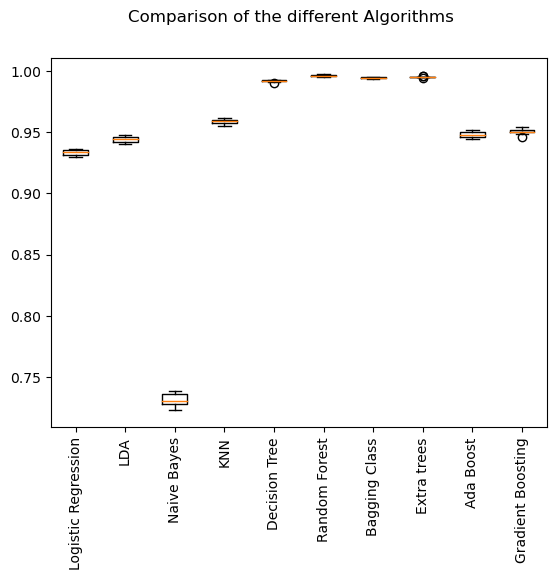

In [49]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle("Comparison of the different Algorithms")
ax=fig.add_subplot(111)
plt.rcParams["figure.figsize"]=[4,6]
plt.boxplot(results)
ax.set_xticklabels(names,rotation="vertical")
plt.show()

In [50]:
#Saving the scalers
from pickle import dump
dump(scaler_x,open("scaler_x.pkl","wb"))

In [51]:
#Fine Tuning the best model

from sklearn.model_selection import GridSearchCV

import numpy as np

max_depth=np.arange(15,21)

parametros=dict(max_depth=max_depth)

model=RandomForestClassifier()

kfold=KFold(n_splits=5,shuffle=True)

grid_result=GridSearchCV(estimator=model,param_grid=parametros,cv=kfold)

grid_result.fit(X_train,(y_train.values.reshape(-1,1)).ravel())

#Summarize_results

print("Best : %f using the params %s" % (grid_result.best_score_ , grid_result.best_params_))

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]


for mean,stdev,param in zip(means,stds,params):
    
  print("%f (%f) with %r" % (mean,stdev,param))

Best : 0.979306 using the params {'max_depth': 20}
0.971853 (0.001459) with {'max_depth': 15}
0.973689 (0.001559) with {'max_depth': 16}
0.975086 (0.001509) with {'max_depth': 17}
0.976862 (0.001311) with {'max_depth': 18}
0.977590 (0.001366) with {'max_depth': 19}
0.979306 (0.001596) with {'max_depth': 20}


In [52]:
#Saving the fine_tuned model
dump(grid_result,open("best_model_red_hat_business.pkl","wb"))

In [53]:
#Evaluating the model using cohen_kappa and classification_report

from sklearn.metrics import cohen_kappa_score,classification_report

y_pred=pd.DataFrame(grid_result.predict(X_test).reshape(-1,1),columns=y_test.columns)

kappa=cohen_kappa_score(y_test,y_pred)

clas_rep=classification_report(y_test,y_pred)

print("Cohen Kappa : %f  " % (kappa))
print("="*80)
print("Classification Report:")
print(clas_rep)

Cohen Kappa : 0.957702  
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     21278
           1       0.96      1.00      0.98     21675

    accuracy                           0.98     42953
   macro avg       0.98      0.98      0.98     42953
weighted avg       0.98      0.98      0.98     42953



In [54]:
#Proving the results

for i in range(0,20):
    
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )

Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 1 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 


In [55]:
#SOLVING THE PROBLEM WITH ARTIFICIAL NEURAL NETWORKS

In [56]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
early=EarlyStopping(monitor="val_accuracy", patience=10)

In [58]:
#Creating the model
model=Sequential()
model.add(Dense(256,activation="relu",input_dim=len(X_train.columns)))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",metrics="accuracy",loss="binary_crossentropy")
history=model.fit(X_train,y_train,epochs=200,batch_size=16,validation_split=0.2,callbacks=[early])

Epoch 1/200
5012/5012 [==============================] - 12s 2ms/step - loss: 0.1652 - accuracy: 0.9453 - val_loss: 0.1453 - val_accuracy: 0.9536
Epoch 2/200
5012/5012 [==============================] - 10s 2ms/step - loss: 0.1401 - accuracy: 0.9539 - val_loss: 0.1351 - val_accuracy: 0.9568
Epoch 3/200
5012/5012 [==============================] - 10s 2ms/step - loss: 0.1242 - accuracy: 0.9590 - val_loss: 0.1251 - val_accuracy: 0.9593
Epoch 4/200
5012/5012 [==============================] - 10s 2ms/step - loss: 0.1145 - accuracy: 0.9623 - val_loss: 0.1166 - val_accuracy: 0.9628
Epoch 5/200
5012/5012 [==============================] - 11s 2ms/step - loss: 0.1070 - accuracy: 0.9645 - val_loss: 0.1139 - val_accuracy: 0.9632
Epoch 6/200
5012/5012 [==============================] - 10s 2ms/step - loss: 0.1004 - accuracy: 0.9669 - val_loss: 0.1077 - val_accuracy: 0.9658
Epoch 7/200
5012/5012 [==============================] - 10s 2ms/step - loss: 0.0956 - accuracy: 0.9678 - val_loss: 0.1054 -

In [59]:
#Evaluating the model
model.evaluate(X_test,y_test)

1343/1343 [==============================] - 2s 2ms/step - loss: 0.1042 - accuracy: 0.9732


[0.1041836068034172, 0.9732032418251038]

In [60]:
#Saving the model
model.save("model_red_hat_keras.h5")

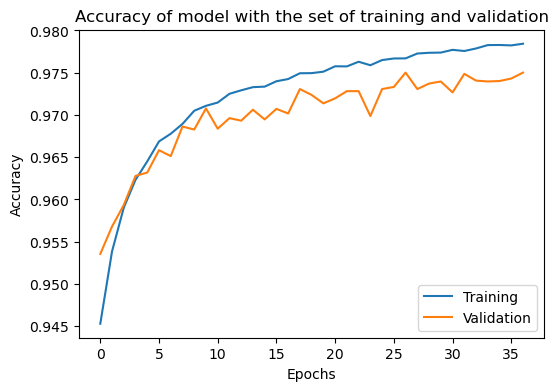

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"]);
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy of model with the set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("Accuracy");
plt.legend(["Training","Validation"],loc="lower right");

In [62]:
#Proving the results

for i in range(0,20):
    
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )

Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 1 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
